In [1]:
# Perform the standard numpy and units imports
import numpy as np
import matplotlib.pyplot as plt
from pint import UnitRegistry
ureg = UnitRegistry()
Q_ = ureg.Quantity
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import sys
import morticia.rad.radute as radute 
from morticia.tools.xd import *
#import optics
# This notebook is used for development/testing of the Optics module, so auto reload the Optics module if it changes
%load_ext autoreload
%aimport morticia.rad.radute
%aimport morticia.tools.xd
%autoreload 1

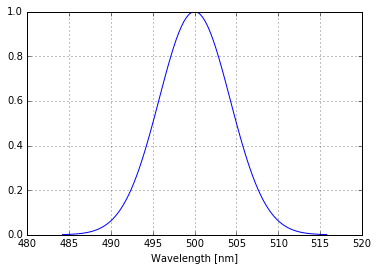

In [3]:
# Illustrate filter generation using rad.srfgen
w,y,wn,wu = radute.srfgen(center=500, fwhm=10, shape='gauss') # Center wavelength and full width at half maximum default to nm
plt.plot(w, y)
plt.xlabel('Wavelength [nm]')
plt.grid()

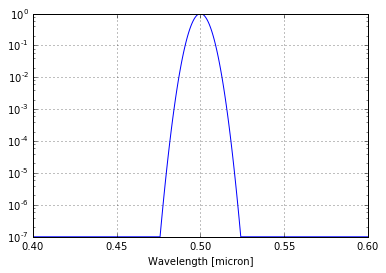

In [4]:
# Gaussian filter on log scale with some out-of-band leackage between 400 and 600 nm
w,y,wn,wu = radute.srfgen(center=500, fwhm=10, shape='gauss', yedge=1e-7, oob=1e-7, wvmin=400, wvmax=600)
plt.semilogy(wu, y)  # plot against wavelength in microns
plt.xlabel('Wavelength [micron]')
plt.grid()

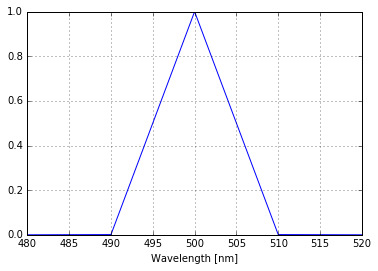

In [5]:
w,y,wn,wu = radute.srfgen(500, 10, shape='bartlett', wvmin=480, wvmax=520)
plt.plot(w, y)
plt.xlabel('Wavelength [nm]')
plt.grid()

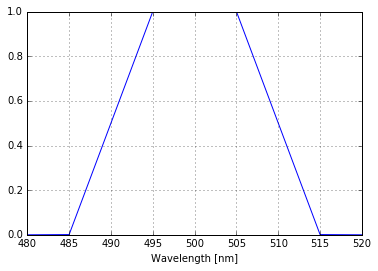

In [6]:
# Bartlett (triangular) again with insertion of center flat region of width 10 nm
w,y,wn,wu = radute.srfgen(500, 10, shape='bartlett', centerflat=10, wvmin=480, wvmax=520)
plt.plot(w, y)
plt.xlabel('Wavelength [nm]')
plt.grid()

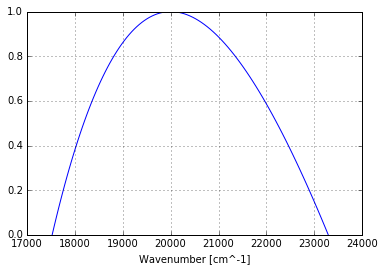

In [7]:
# Generate in wavelength space (nm by default) and plot in wavenumber space
w,y,wn,wu = radute.srfgen(500, 100, shape='welch') # center and full width at half max default to nm
plt.plot(wn, y)  #  plot against wavenumber per cm, note how the filter is obviously skewed in wavenumber space if 
# sufficienty wide
plt.xlabel('Wavenumber [cm^-1]')
plt.grid()

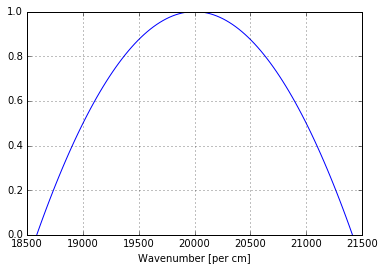

In [8]:
# Similar, but this time, generate the filter in wavenumber scale and also plot in wavenumber scale
w,y,wn,wu = radute.srfgen(20000.0, 2000.0, shape='welch', units='cm^-1')
plt.plot(wn, y)  #  plot against wavenumber per cm
plt.xlabel('Wavenumber [per cm]')
plt.grid()

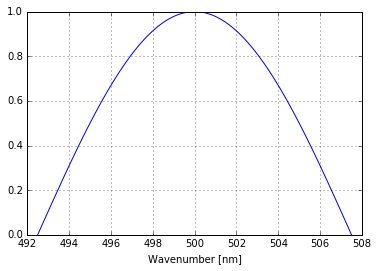

In [9]:
w,y,wn,wu = radute.srfgen(500, 10, shape='cosine')
plt.plot(w, y)
plt.xlabel('Wavenumber [nm]')
plt.grid()

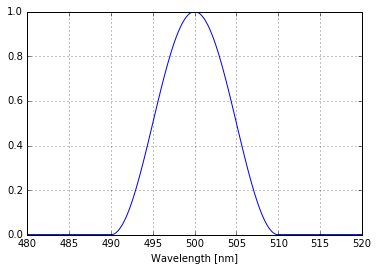

In [10]:
w,y,wn,wu = radute.srfgen(500, 10, shape='cos^2', wvmin=480, wvmax=520, oob=0.001)
plt.plot(w, y)
plt.xlabel('Wavelength [nm]')
plt.grid()

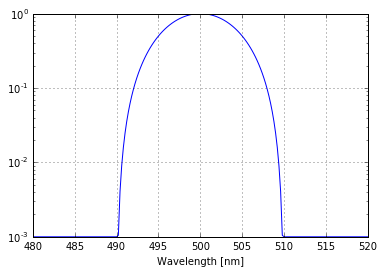

In [11]:
# Same, plotted on a log scale
plt.semilogy(w, y)
plt.xlabel('Wavelength [nm]')
plt.grid()

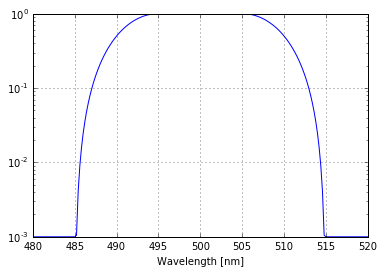

In [12]:
# Same as previous, but open a central flat region of 10 nm width
# Note that the full width at half max is now 20 nm (fwhm + centerflat)
w,y,wn,wu = radute.srfgen(500, 10, shape='cos^2', centerflat=10, wvmin=480, wvmax=520, oob=0.001)
plt.semilogy(w, y)
plt.xlabel('Wavelength [nm]')
plt.grid()

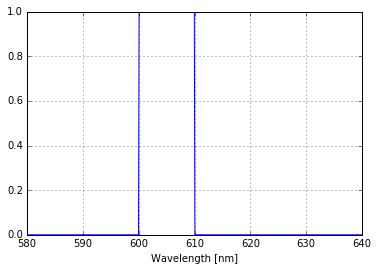

In [13]:
w,y,wn,wu = radute.srfgen(605, 10, shape='tophat', wvmin=580, wvmax=640)
plt.plot(w, y)
plt.xlabel('Wavelength [nm]')
plt.grid()

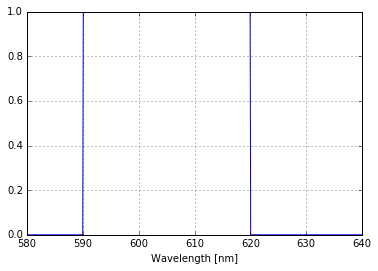

In [14]:
# Opening a centre flat region also works with tophats (box) although you could just increase fwhm
w,y,wn,wu = radute.srfgen(605, 10, shape='tophat', centerflat=20, wvmin=580, wvmax=640)
plt.plot(w, y)
plt.xlabel('Wavelength [nm]')
plt.grid()

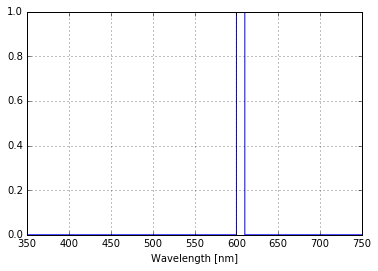

In [15]:
# Show the tophat function, which defines a tophat using only a few points
w,y,wn,wu = radute.tophat(605, 10, delta=0.001, wvmin=350, wvmax=750)
plt.plot(w,y)
plt.xlabel('Wavelength [nm]')
plt.grid()

In [16]:
# Create 3 MODTRAN-style flt filters/SRFs with different postions, widths and shapes
filt = radute.Flt('My Special Filters', filterheaders = ['a', 'b', 'c'], centers = [500, 600, 700], fwhms = [10, 20, 30],
               shapes=['gauss', 'cos^2', 'welch'])

In [17]:
# Write the filters/SRFs in MODTRAN .flt format to a text file
filt.write('./radata/SpecialFilters')

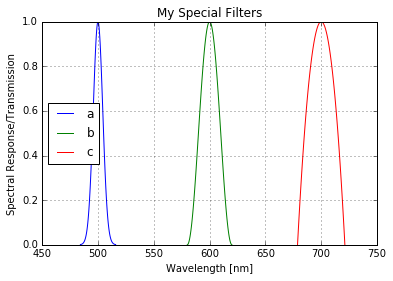

In [18]:
# Plot the filters
filt.plot()

In [ ]:
# Create some filters with just a few points
filt2 = radute.Flt('Hand Filters', filterheaders=['a', 'b'], filters=[np.array([[300, 0.5],[400, 1.0]]),
                                                                   np.array([[300, 0.3],[400, 0.2]])])

In [ ]:
filt2.plot()

In [ ]:
filt2

In [70]:
CIE = radute.Flt('./radata/CIEXYZ2.flt')

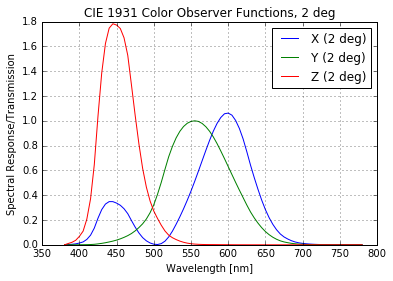

In [71]:
CIE.plot()

In [72]:
CIE.name

'CIE 1931 Color Observer Functions, 2 deg'

In [73]:
range(3)

[0, 1, 2]

In [74]:
x[0].name

'srf'

In [83]:
y = CIE.flt_as_xd_harmonised()

In [84]:
y['chn']

<xray.DataArray 'chn' (chn: 3)>
array([0, 1, 2])
Coordinates:
  * chn      (chn) int32 0 1 2
Attributes:
    labels: ['X (2 deg)', 'Y (2 deg)', 'Z (2 deg)']

In [85]:
y['wvl']

<xray.DataArray 'wvl' (wvl: 81)>
array([ 380.,  385.,  390.,  395.,  400.,  405.,  410.,  415.,  420.,
        425.,  430.,  435.,  440.,  445.,  450.,  455.,  460.,  465.,
        470.,  475.,  480.,  485.,  490.,  495.,  500.,  505.,  510.,
        515.,  520.,  525.,  530.,  535.,  540.,  545.,  550.,  555.,
        560.,  565.,  570.,  575.,  580.,  585.,  590.,  595.,  600.,
        605.,  610.,  615.,  620.,  625.,  630.,  635.,  640.,  645.,
        650.,  655.,  660.,  665.,  670.,  675.,  680.,  685.,  690.,
        695.,  700.,  705.,  710.,  715.,  720.,  725.,  730.,  735.,
        740.,  745.,  750.,  755.,  760.,  765.,  770.,  775.,  780.])
Coordinates:
  * wvl      (wvl) float64 380.0 385.0 390.0 395.0 400.0 405.0 410.0 415.0 ...
Attributes:
    long_name: Wavelength
    units: nm

In [86]:
y

<xray.DataArray 'srf' (wvl: 81, chn: 3)>
array([[  1.40000000e-03,   0.00000000e+00,   0.00000000e+00],
       [  2.20000000e-03,   1.00000000e-04,   1.05000000e-02],
       [  4.20000000e-03,   1.00000000e-04,   2.01000000e-02],
       [  7.60000000e-03,   2.00000000e-04,   3.62000000e-02],
       [  1.43000000e-02,   4.00000000e-04,   6.79000000e-02],
       [  2.32000000e-02,   6.00000000e-04,   1.10200000e-01],
       [  4.35000000e-02,   1.20000000e-03,   2.07400000e-01],
       [  7.76000000e-02,   2.20000000e-03,   3.71300000e-01],
       [  1.34400000e-01,   4.00000000e-03,   6.45600000e-01],
       [  2.14800000e-01,   7.30000000e-03,   1.03910000e+00],
       [  2.83900000e-01,   1.16000000e-02,   1.38560000e+00],
       [  3.28500000e-01,   1.68000000e-02,   1.62300000e+00],
       [  3.48300000e-01,   2.30000000e-02,   1.74710000e+00],
       [  3.48100000e-01,   2.98000000e-02,   1.78260000e+00],
       [  3.36200000e-01,   3.80000000e-02,   1.77210000e+00],
       [  3.18

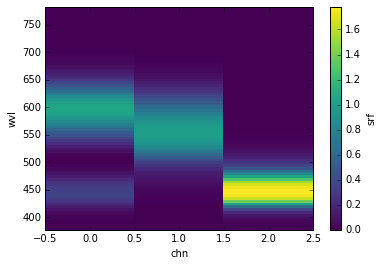

In [87]:
y.plot()

In [88]:
# Read the aviris spectral response functions and convert to an xray.DataArray
AvirisFLT = radute.Flt('./radata/aviris.flt')

In [89]:
AvirisXD = AvirisFLT.flt_as_xd_harmonised()

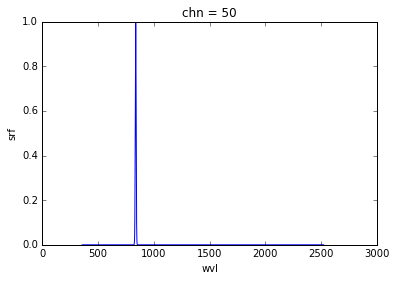

In [102]:
# Plot channel 50 (actually channel 51 if counting from 1)
AvirisXD.isel(chn=50).plot()

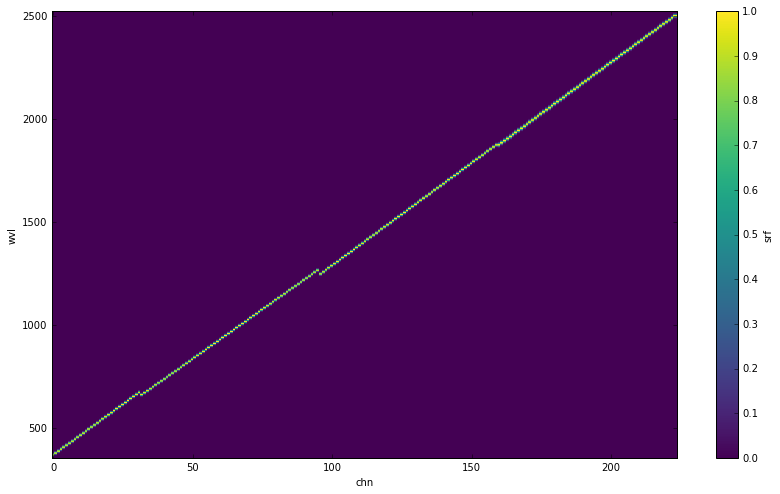

In [101]:
# Plot all channels (takes a few seconds)
plt.figure(figsize=(14,8))
AvirisXD.plot()